## Use case 2: Predicting mental health

Download the Depression Dataset (kaggle.com) from https://www.kaggle.com/datasets/anthonytherrien/depression-dataset/data.

### Question 1:

Use methods of your choice (e.g. exploratory data analysis, statistical methods, visualisations etc.)  to extract useful insights from the data. 

### Question 2:

Use suitable models to predict if an individual will suffer mental illness (variable titled “History of Mental Illness”) using all or some of the other variables present in the data.

Your answer should also contain:

Narratives for including/excluding variables of choice;
Narrative supporting the model/s of choice,
An assessment of model performance,
Assessment of potential model biases.
 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset
df = pd.read_csv('depression_data.csv')

# Displaying the first few rows
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [3]:
# Check data types, missing values, and summary
print(df.info());
df.describe(include='all');

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

### This step ensures we understand the data types (categorical or numerical), detect missing values, and get basic statistical summaries.

Missing Values:
 Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64


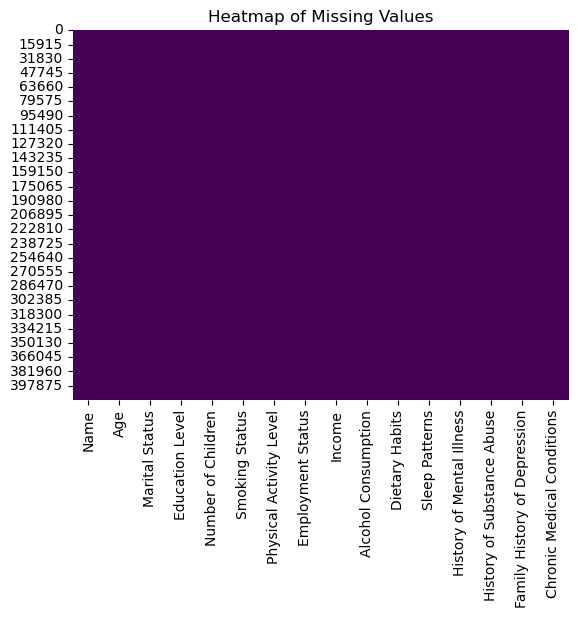

In [4]:
# Check missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values")
plt.show()

# Impute or drop missing values (example strategies)
df.fillna(method='ffill', inplace=True)

Missing data can significantly impact model performance. Imputing missing values ensures completeness without losing information. We didnt have to do anything as the dataset doenst contain any missing data. Probably its a synthetic dataset.

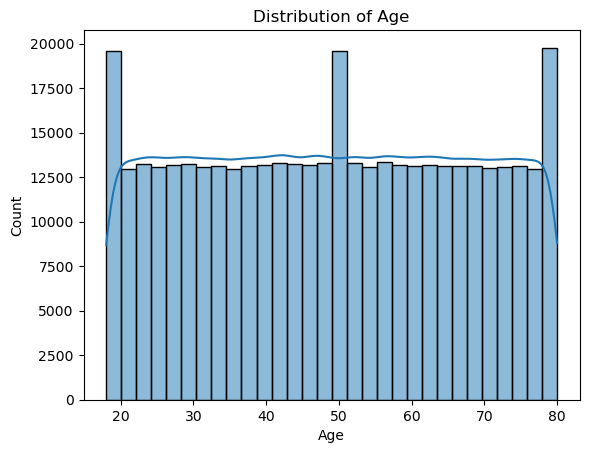

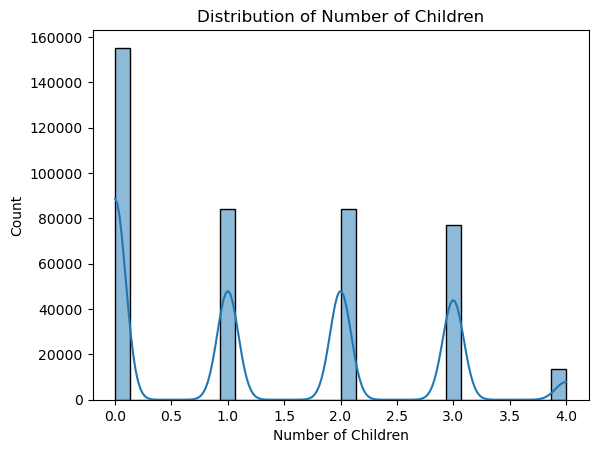

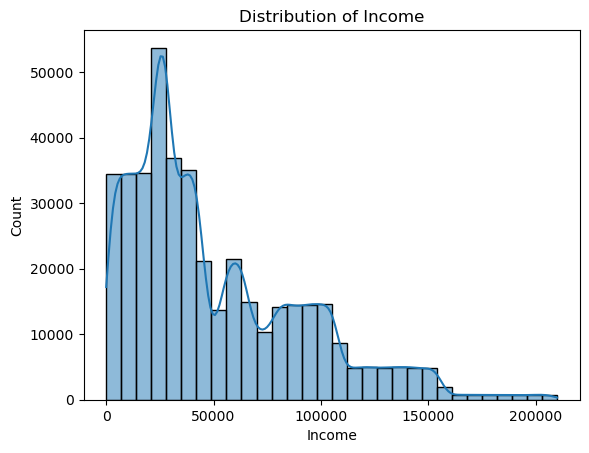

In [5]:
# Distribution of numerical variables
numerical_columns = ['Age', 'Number of Children', 'Income']
for col in numerical_columns:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

### Identifying the spread and skewness of numerical variables helps in scaling or transformations.

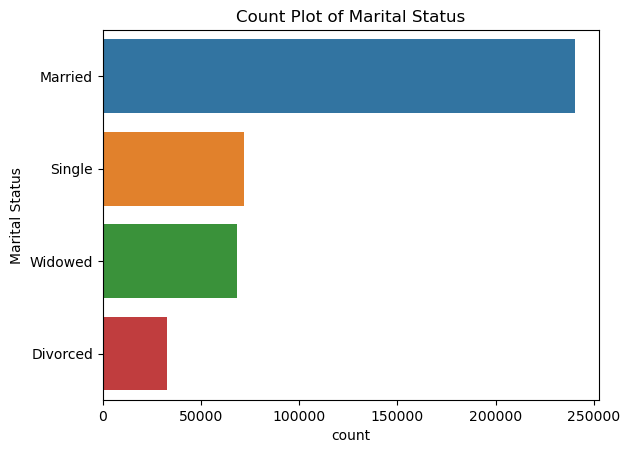

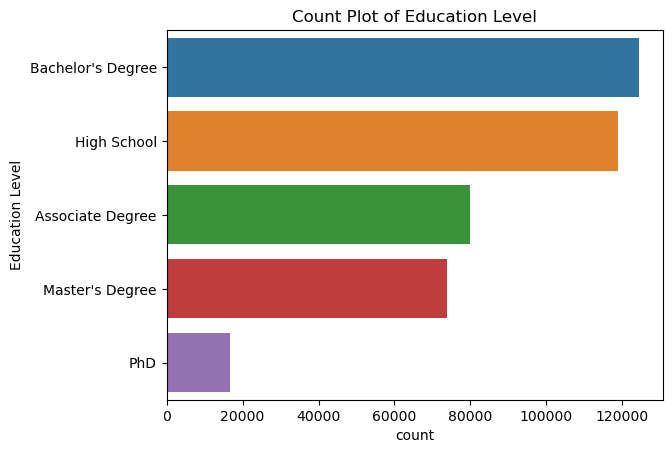

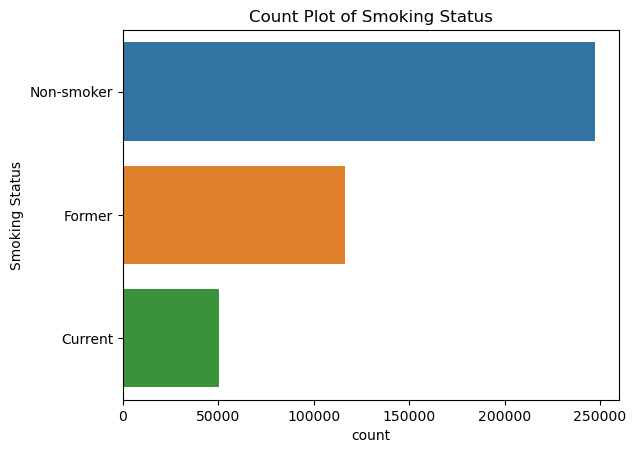

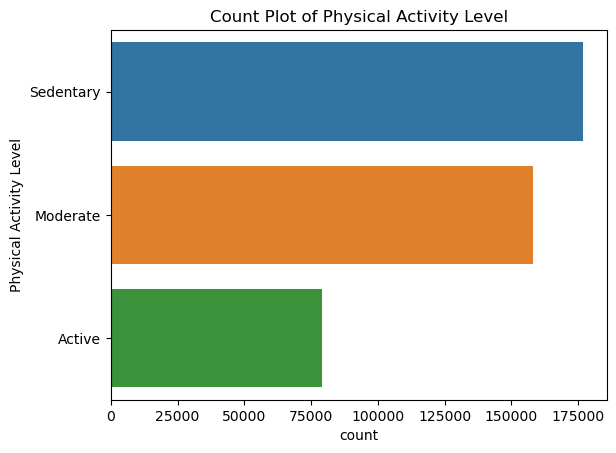

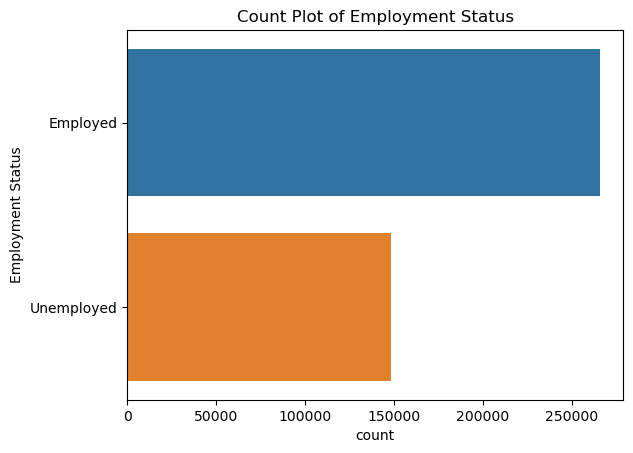

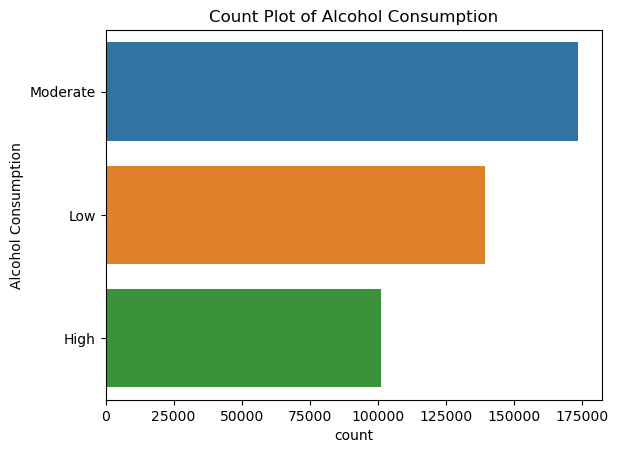

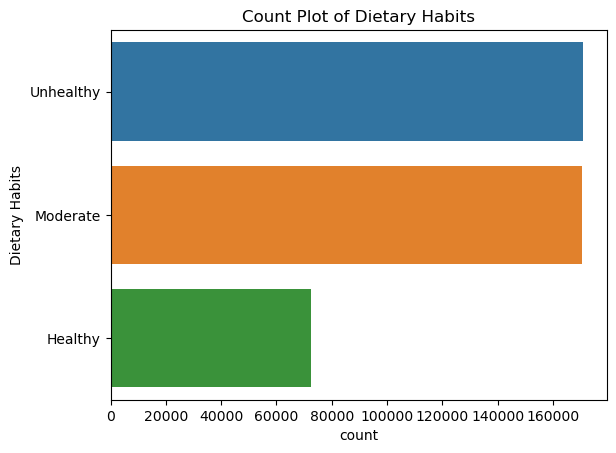

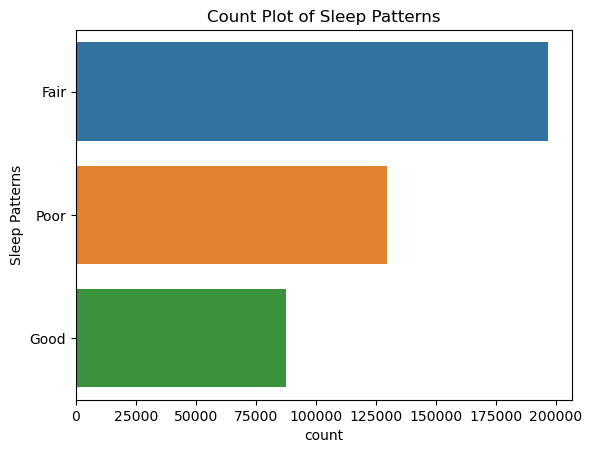

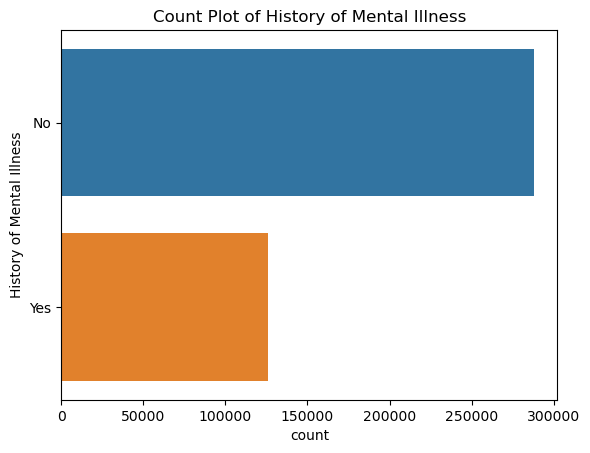

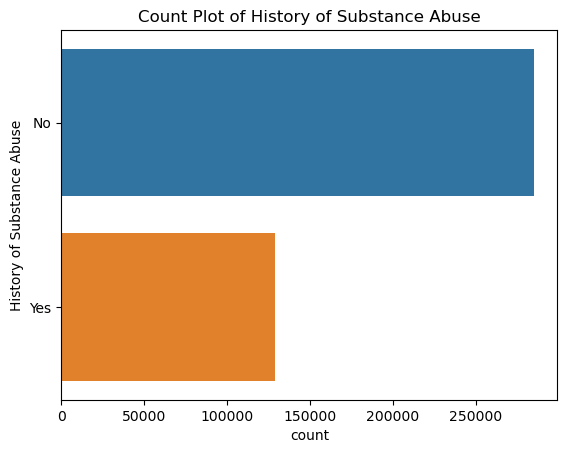

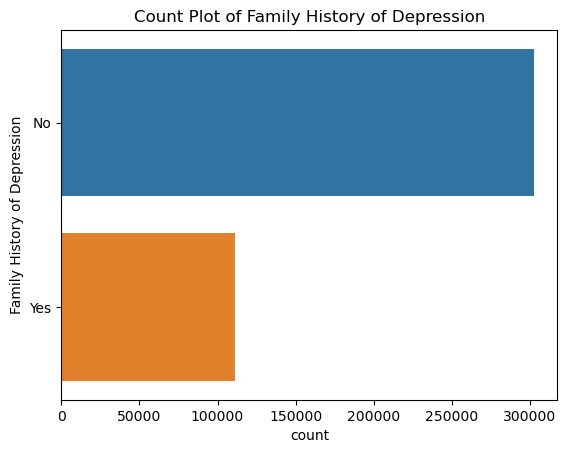

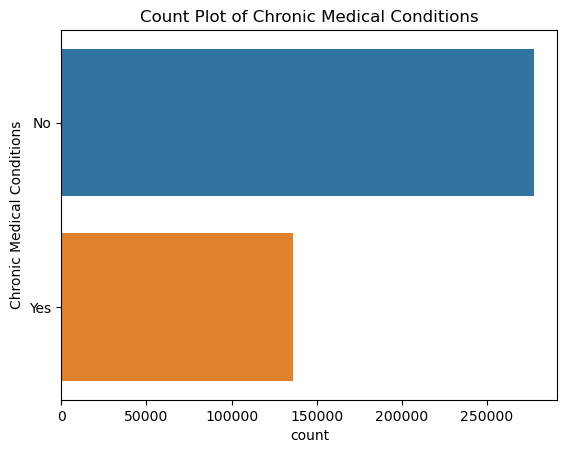

In [6]:
# Count plots for categorical variables
categorical_columns = ['Marital Status', 'Education Level', 'Smoking Status', 'Physical Activity Level', 
                       'Employment Status', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
                       'History of Mental Illness', 'History of Substance Abuse', 'Family History of Depression', 
                       'Chronic Medical Conditions']
for col in categorical_columns:
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.show()

### Correlation helps detect multicollinearity among numerical variables, which can affect model performance.

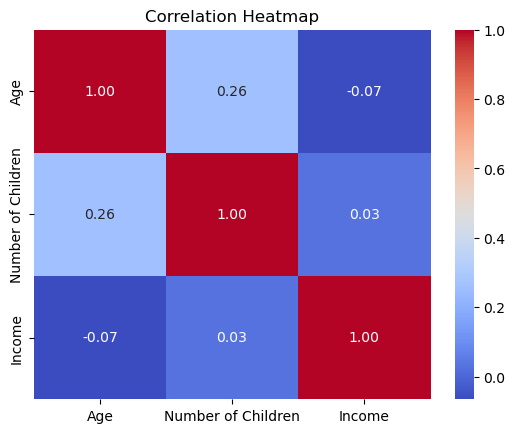

In [7]:
# Correlation heatmap
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

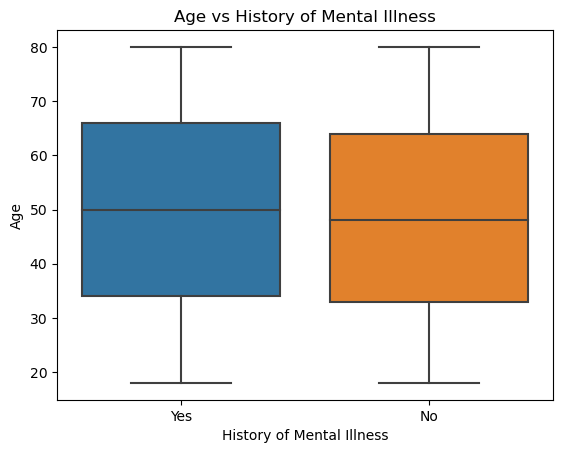

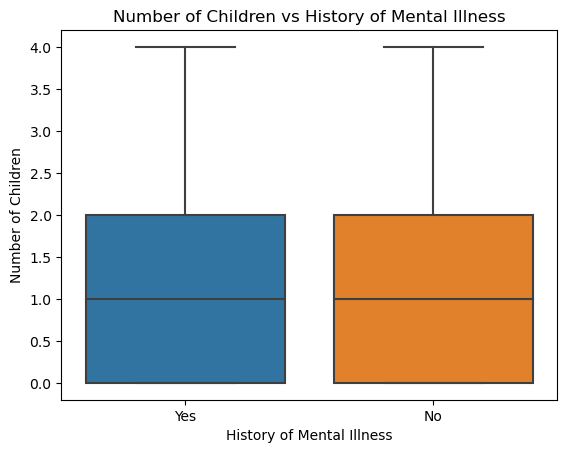

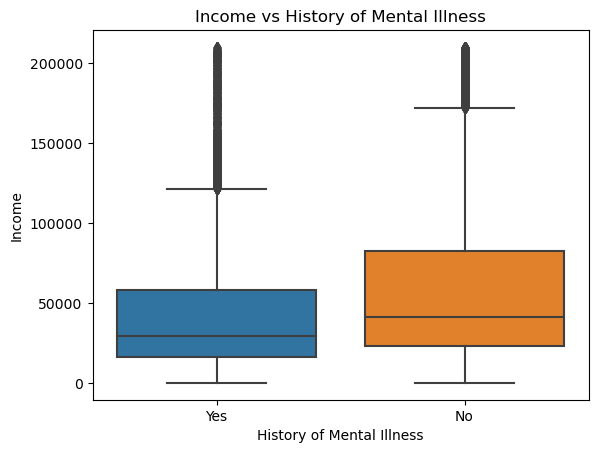

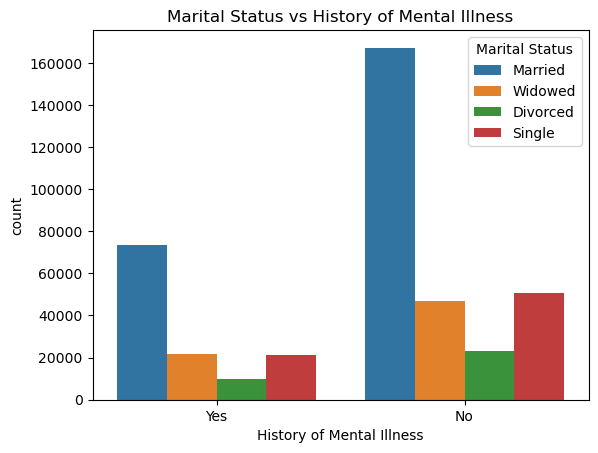

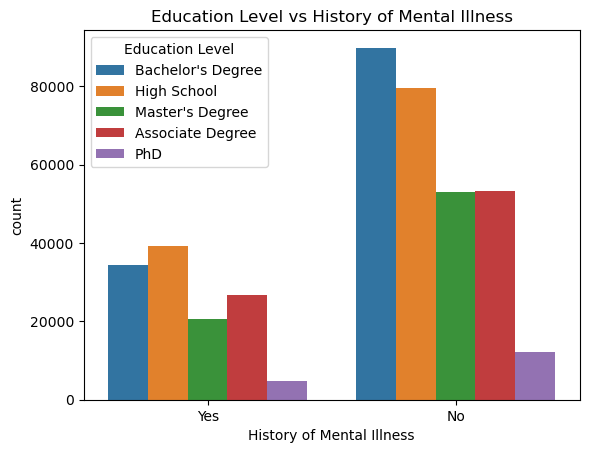

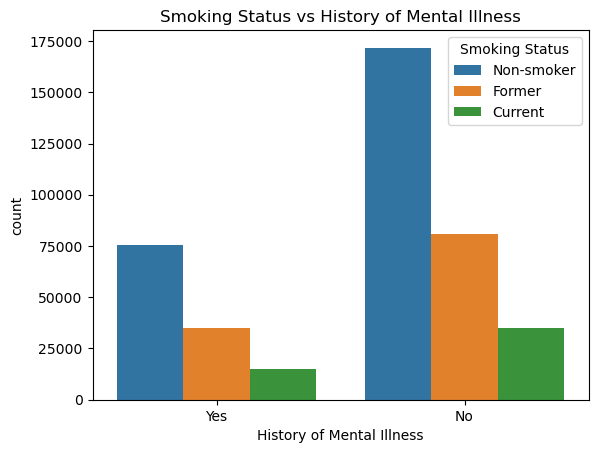

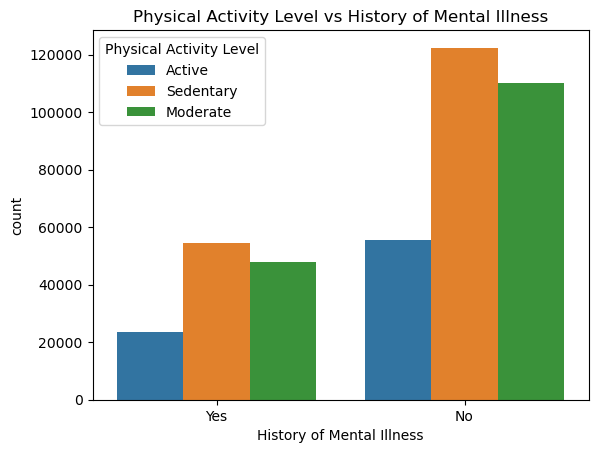

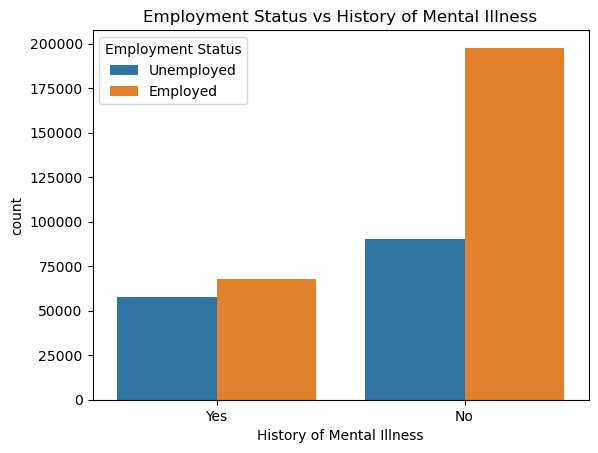

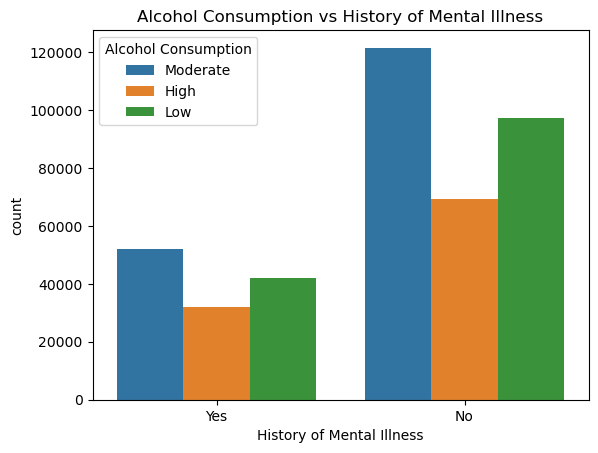

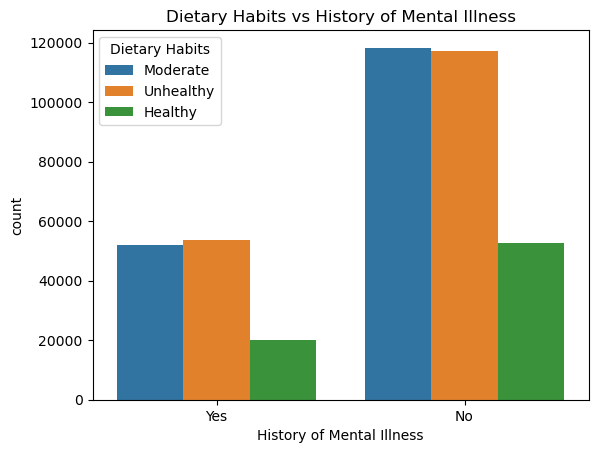

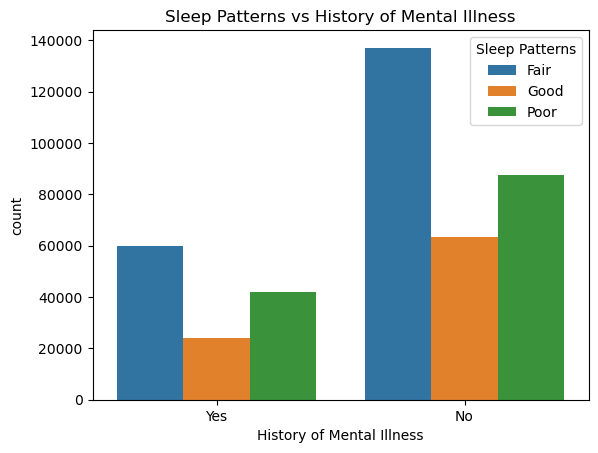

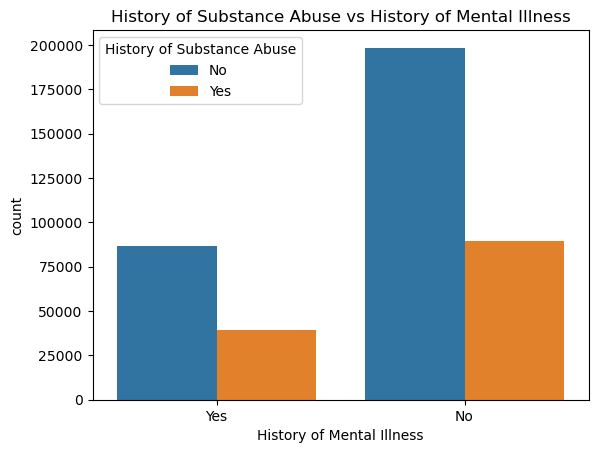

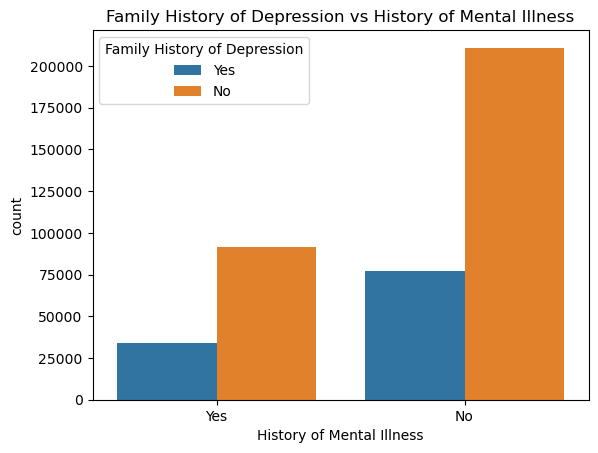

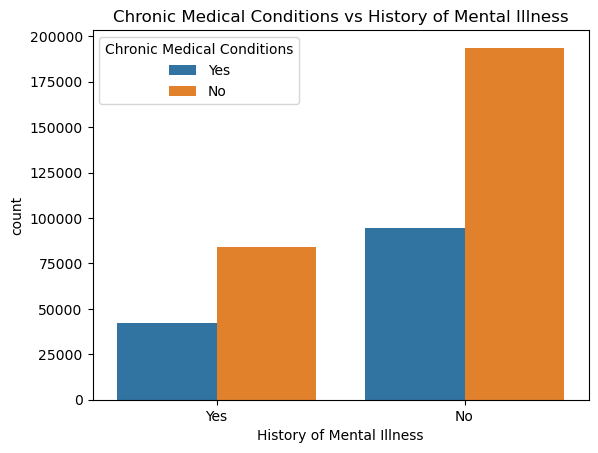

In [8]:
# Boxplots for numerical variables vs target
for col in numerical_columns:
    sns.boxplot(x='History of Mental Illness', y=col, data=df)
    plt.title(f"{col} vs History of Mental Illness")
    plt.show()

# Count plots for categorical variables vs target
for col in categorical_columns:
    if col != 'History of Mental Illness':  # Exclude target from predictors
        sns.countplot(x='History of Mental Illness', hue=col, data=df)
        plt.title(f"{col} vs History of Mental Illness")
        plt.show()


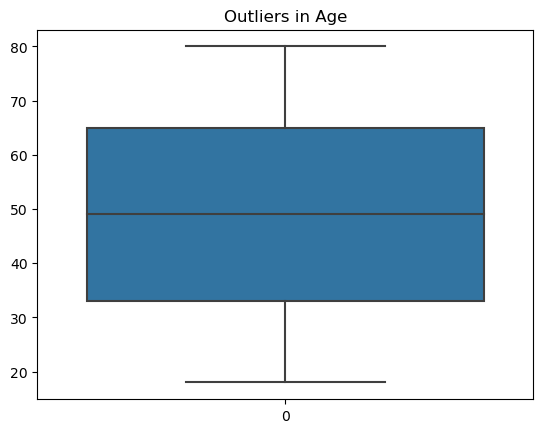

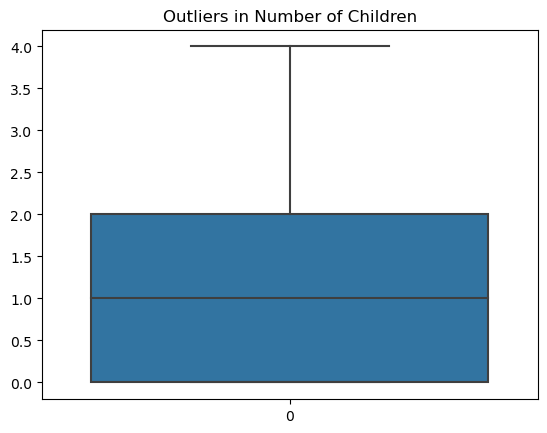

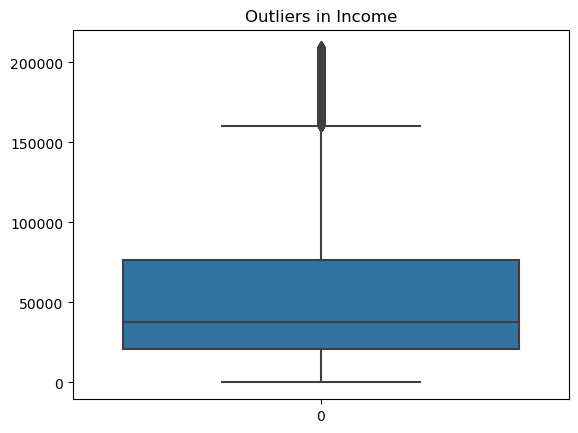

In [9]:
# Boxplot to identify outliers
for col in numerical_columns:
    sns.boxplot(df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

### Outliers can distort the model, especially in sensitive algorithms like logistic regression. We might consider scaling or removing them if necessary.

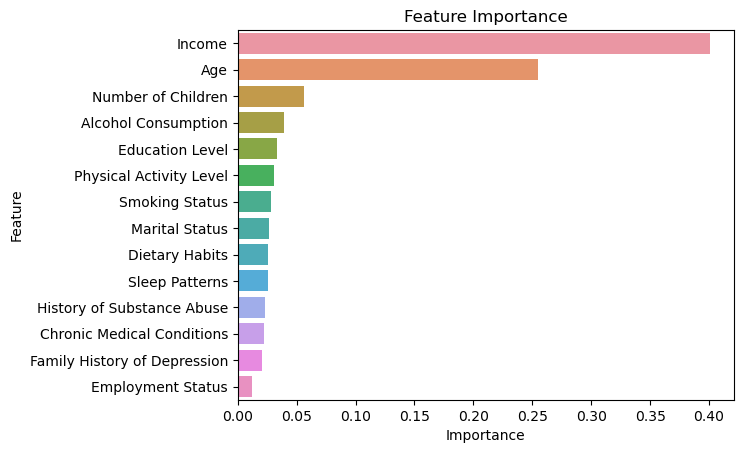

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables for Random Forest
df_encoded = df.iloc[:, 1:].copy()

for col in categorical_columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Define X and y
X = df_encoded.drop('History of Mental Illness', axis=1)
y = LabelEncoder().fit_transform(df_encoded['History of Mental Illness'])

# Fit Random Forest to gauge feature importance
rf = RandomForestClassifier()
rf.fit(X, y)

# Plot feature importance
importance = pd.DataFrame({'Feature': X.columns, 
                           'Importance': rf.feature_importances_}).sort_values(by='Importance', 
                                                                               ascending=False)
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title("Feature Importance")
plt.show()


Preliminary feature importance provides insights into variables that may be predictive, guiding feature selection.

    -Key Takeaways:

    . Variables like Income, Age, Number of Children etc shows significant relationships with mental illness.

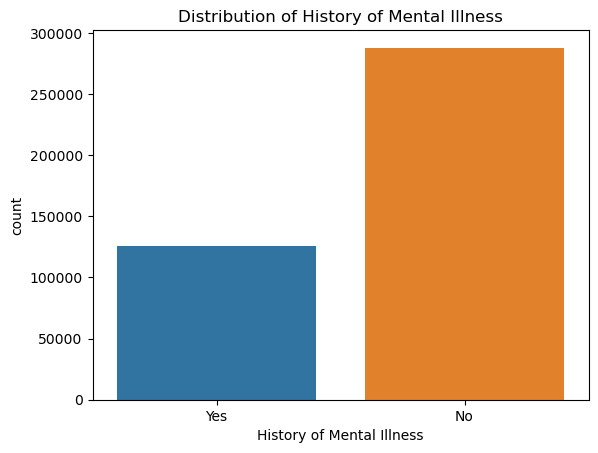

Class Imbalance:
 No     287943
Yes    125825
Name: History of Mental Illness, dtype: int64


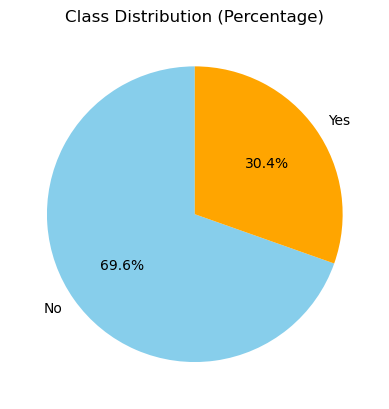

In [11]:
# Check the distribution of the target variable
sns.countplot(x=df['History of Mental Illness'])
plt.title("Distribution of History of Mental Illness")
plt.show()

# Calculate class imbalance
class_counts = df['History of Mental Illness'].value_counts()
print("Class Imbalance:\n", class_counts)

# Visualize percentage imbalance
class_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title("Class Distribution (Percentage)")
plt.ylabel("")
plt.show()


Class imbalance in the target variable can significantly affect model performance, requiring techniques like oversampling or balanced algorithms. From this plot that the class imbalance isnt massive and we can move ahead without class rebalancing.

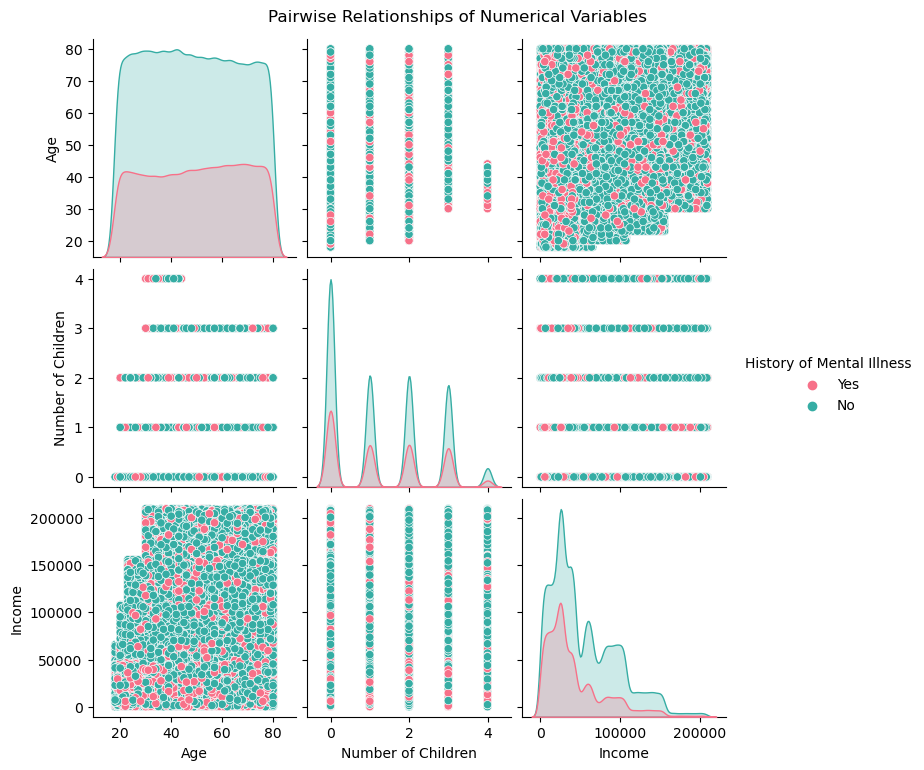

In [12]:
# Pairplot for numerical variables colored by the target variable
sns.pairplot(df, vars=numerical_columns, hue='History of Mental Illness', diag_kind='kde', palette='husl')
plt.suptitle("Pairwise Relationships of Numerical Variables", y=1.02)
plt.show()

The pairplot is helpful for uncovering patterns and relationships between the variables, which can be useful when you move on to predictive modeling.

#### Key insights:
   - Age and Mental Illness: Younger individuals seem to have a slightly higher occurrence of mental illness.
    
   - Number of Children and Mental Illness: There's no clear trend based on the number of children, but the number of children distribution for individuals with mental illness is quite sparse.
    
   - Income and Mental Illness: People with a history of mental illness appear to be concentrated at the lower-income range, with fewer high-income individuals reporting mental health issues.

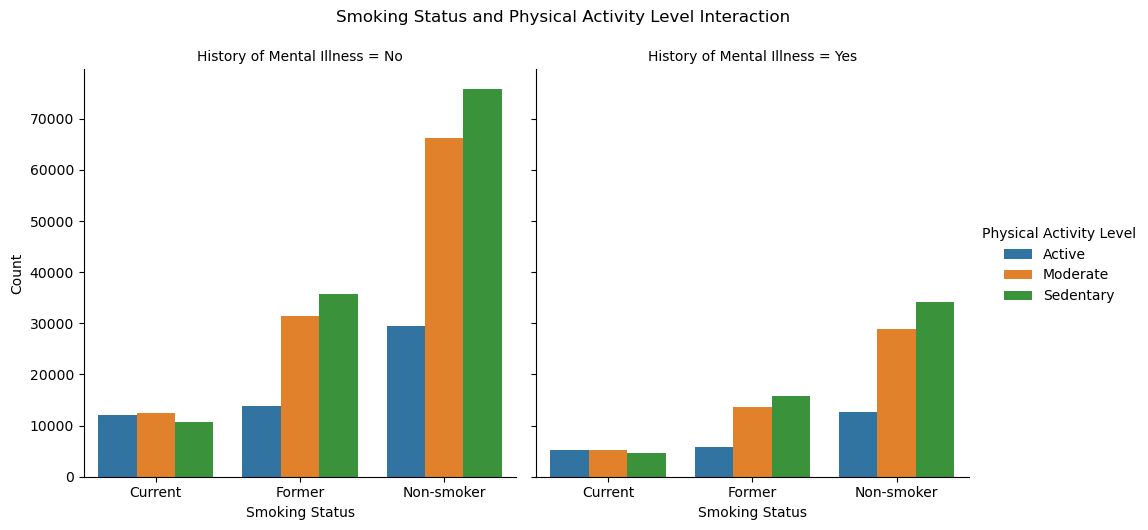

In [13]:
# Example: Smoking Status vs Physical Activity Level vs History of Mental Illness
interaction_df = df.groupby(['Smoking Status', 'Physical Activity Level', 'History of Mental Illness']).size().reset_index(name='Count')
sns.catplot(x='Smoking Status', y='Count', hue='Physical Activity Level', col='History of Mental Illness', data=interaction_df, kind='bar')
plt.suptitle("Smoking Status and Physical Activity Level Interaction", y=1.05)
plt.show()

Interaction effects between categorical variables can reveal deeper patterns and dependencies.

The plot suggests that people with no history of mental illness tend to have more active or moderate physical activity, especially among non-smokers.
In contrast, those with a history of mental illness show a higher proportion of sedentary individuals, especially among non-smokers and former smokers, indicating a possible correlation between sedentary behavior and mental health.

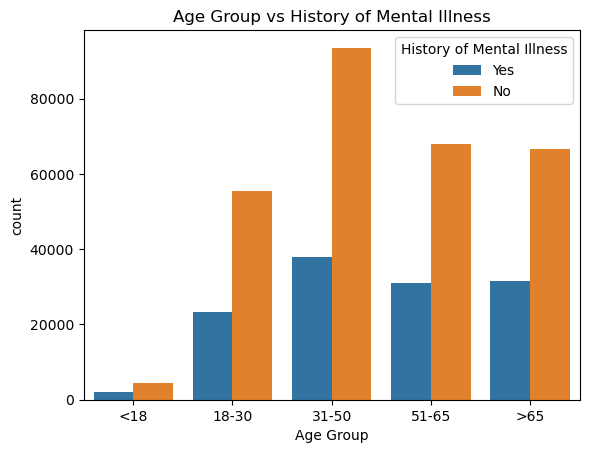

In [13]:
# Cohort analysis by age
age_bins = [0, 18, 30, 50, 65, 100]
age_labels = ['<18', '18-30', '31-50', '51-65', '>65']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Distribution of History of Mental Illness by Age Group
sns.countplot(x='Age Group', hue='History of Mental Illness', data=df)
plt.title("Age Group vs History of Mental Illness")
plt.show()


Temporal insights or age trends help us understand population-level risk factors for mental illness.

In [14]:
# VIF (Variance Inflation Factor) to detect multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for numerical features
X = df[numerical_columns].dropna()  # Drop missing values for this calculation
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("Variance Inflation Factor (VIF):\n", vif_data)


Variance Inflation Factor (VIF):
               Feature       VIF
0                 Age  3.076132
1  Number of Children  2.240282
2              Income  2.079540


Multicollinearity among numerical predictors can distort the interpretability and reliability of models like logistic regression.


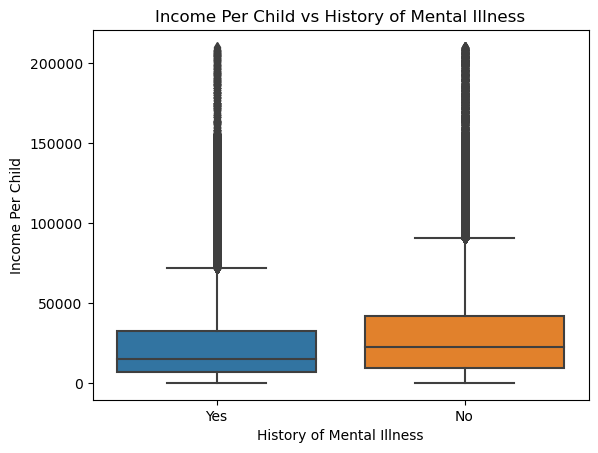

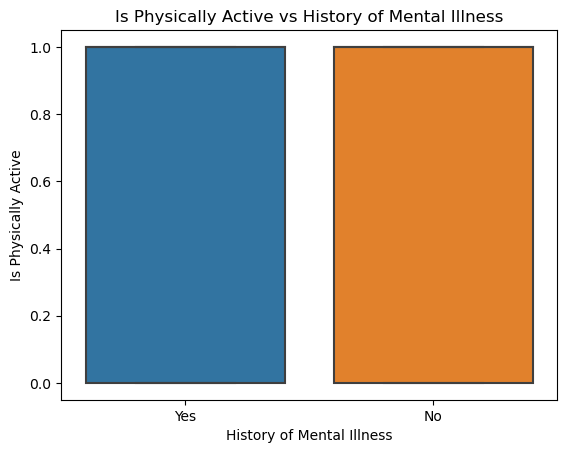

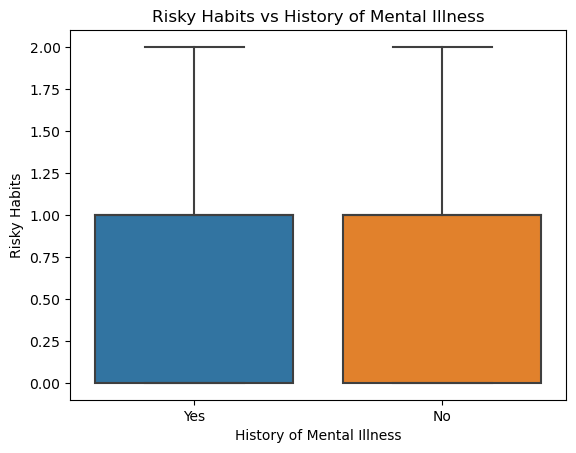

In [15]:
# Create new features
df['Income Per Child'] = df['Income'] / (df['Number of Children'] + 1)  # Avoid division by zero
df['Is Physically Active'] = df['Physical Activity Level'].apply(lambda x: 1 if x in ['Active', 'Moderate'] else 0)
df['Risky Habits'] = df['Smoking Status'].apply(lambda x: 1 if x != 'Non-smoker' else 0) + df['Alcohol Consumption'].apply(lambda x: 1 if x == 'High' else 0)

# Check correlations of new features with target
new_features = ['Income Per Child', 'Is Physically Active', 'Risky Habits']
for col in new_features:
    sns.boxplot(x='History of Mental Illness', y=df[col], data=df)
    plt.title(f"{col} vs History of Mental Illness")
    plt.show()


Derived features can enhance predictive power by capturing latent information or interactions.

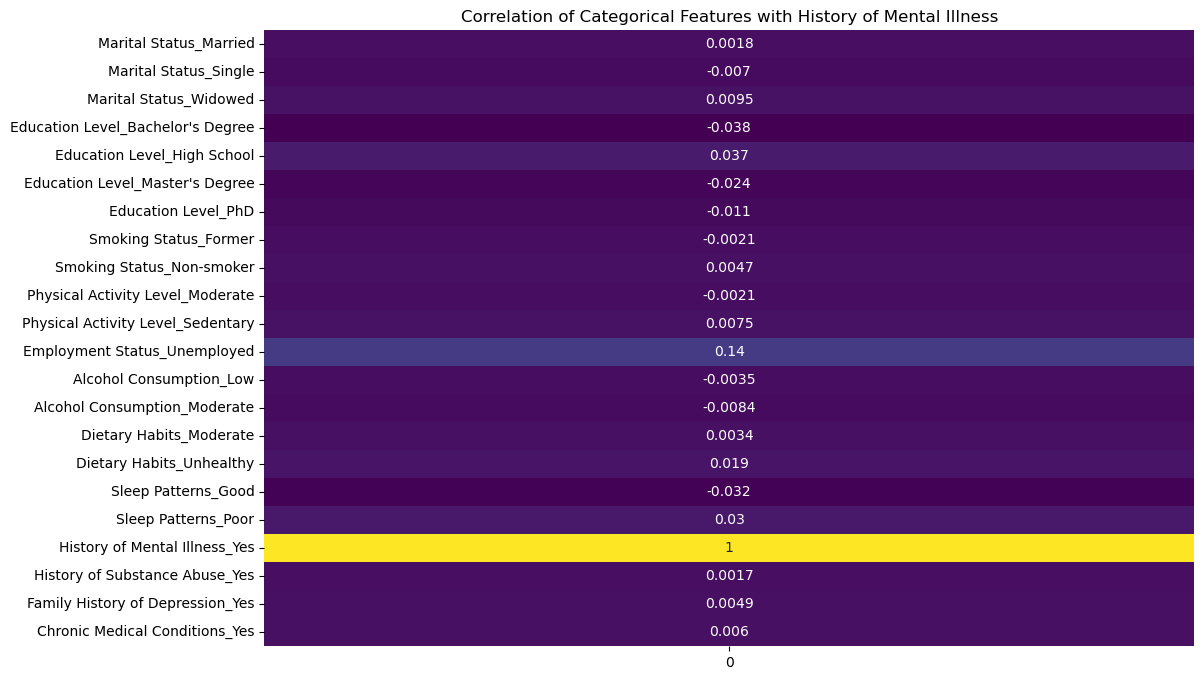

In [16]:
# Heatmap for categorical variables
categorical_encoded = pd.get_dummies(df[categorical_columns], drop_first=True)
correlation_categorical = categorical_encoded.corrwith(df['History of Mental Illness'].apply(lambda x: 1 if x == 'Yes' else 0))

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_categorical.to_frame(), annot=True, cmap='viridis', cbar=False)
plt.title("Correlation of Categorical Features with History of Mental Illness")
plt.show()


This identifies categorical predictors most strongly associated with the target variable.

Exploring spatial or regional differences can reveal environment-related mental health risks.



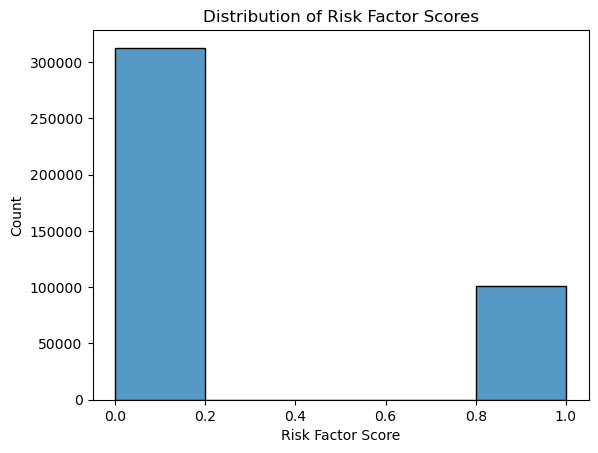

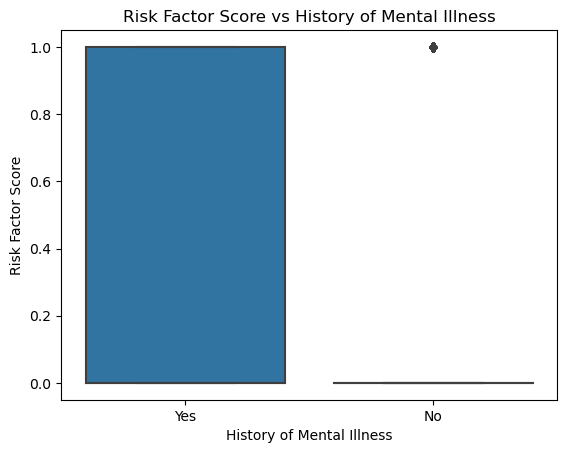

In [18]:
# Combining risky behaviors into a score
df['Risk Factor Score'] = df[['Smoking Status', 'Alcohol Consumption', 
                              'Dietary Habits', 'Sleep Patterns']].apply(lambda x: (x == 'High').sum(), axis=1)

sns.histplot(df['Risk Factor Score'], kde=False, bins=5)
plt.title("Distribution of Risk Factor Scores")
plt.show()

# Risk factor score vs History of Mental Illness
sns.boxplot(x='History of Mental Illness', y='Risk Factor Score', data=df)
plt.title("Risk Factor Score vs History of Mental Illness")
plt.show()

Aggregating multiple behavioral features provides a composite risk metric, which might enhance model performance.

## Machine Learning

In [19]:
# Check and impute missing values
df.fillna(method='ffill', inplace=True)

In [20]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Marital Status', 'Education Level', 'Smoking Status', 'Physical Activity Level', 
                       'Employment Status', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
                       'History of Substance Abuse', 'Family History of Depression', 'Chronic Medical Conditions']

df_encoded = df.copy()
for col in categorical_columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Encode the target variable
df_encoded['History of Mental Illness'] = df_encoded['History of Mental Illness'].apply(lambda x: 1 if x == 'Yes' else 0)

Categorical variables are label-encoded for compatibility with machine learning models. Encoding the target variable as binary (0/1) makes it suitable for classification.

In [21]:
# Define features and target
X = df_encoded.drop(['Name', 'History of Mental Illness','Age Group'], axis=1)  # Exclude Name and target
y = df_encoded['History of Mental Illness']

Variables like Name are excluded as they are irrelevant to prediction. Features like Age, Income, and Family History of Depression are included based on domain knowledge and EDA insights.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Stratified splitting ensures class distribution is maintained between train and test sets, mitigating class imbalance.

Model Selection
We’ll use the following models:

    Logistic Regression: A baseline model for binary classification.
    Random Forest: Handles non-linear relationships, feature importance, and interactions well.
    Gradient Boosting (XGBoost): Robust to outliers, effective for imbalanced datasets.
    Etc...


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Train logistic regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))

# ROC-AUC Score
y_prob_log = log_reg.predict_proba(X_test)[:, 1]
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, y_prob_log))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82     86383
           1       0.00      0.00      0.00     37748

    accuracy                           0.70    124131
   macro avg       0.35      0.50      0.41    124131
weighted avg       0.48      0.70      0.57    124131

Logistic Regression ROC-AUC: 0.5814749756779768


In [24]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

# Feature Importance
importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)
print(importances)


Random Forest Report:
               precision    recall  f1-score   support

           0       0.70      0.92      0.79     86383
           1       0.36      0.11      0.17     37748

    accuracy                           0.67    124131
   macro avg       0.53      0.51      0.48    124131
weighted avg       0.60      0.67      0.60    124131

                         Feature  Importance
7                         Income    0.252429
14              Income Per Child    0.243333
0                            Age    0.181240
2                Education Level    0.033455
3             Number of Children    0.032876
9                 Dietary Habits    0.029995
10                Sleep Patterns    0.029414
1                 Marital Status    0.028849
11    History of Substance Abuse    0.025368
13    Chronic Medical Conditions    0.024755
8            Alcohol Consumption    0.024650
12  Family History of Depression    0.022656
5        Physical Activity Level    0.021597
4                 Sm

In [25]:
from xgboost import XGBClassifier

# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))

# ROC-AUC Score
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]
print("XGBoost ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))


XGBoost Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82     86383
           1       0.35      0.01      0.01     37748

    accuracy                           0.69    124131
   macro avg       0.52      0.50      0.42    124131
weighted avg       0.59      0.69      0.57    124131

XGBoost ROC-AUC: 0.5938558286037807


In [26]:
from imblearn.over_sampling import SMOTE

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train models on resampled data (example with Random Forest)
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred_rf_smote = rf_smote.predict(X_test)
print("Random Forest with SMOTE Report:\n", classification_report(y_test, y_pred_rf_smote))

Random Forest with SMOTE Report:
               precision    recall  f1-score   support

           0       0.71      0.84      0.77     86383
           1       0.35      0.20      0.25     37748

    accuracy                           0.64    124131
   macro avg       0.53      0.52      0.51    124131
weighted avg       0.60      0.64      0.61    124131



In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]

print("KNN Report:\n", classification_report(y_test, y_pred_knn))
print("KNN ROC-AUC:", roc_auc_score(y_test, y_prob_knn))


KNN Report:
               precision    recall  f1-score   support

           0       0.70      0.83      0.76     86383
           1       0.34      0.20      0.25     37748

    accuracy                           0.64    124131
   macro avg       0.52      0.52      0.51    124131
weighted avg       0.59      0.64      0.61    124131

KNN ROC-AUC: 0.5309372293869056


In [28]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb.predict(X_test)
y_prob_nb = nb.predict_proba(X_test)[:, 1]

print("Naive Bayes Report:\n", classification_report(y_test, y_pred_nb))
print("Naive Bayes ROC-AUC:", roc_auc_score(y_test, y_prob_nb))


Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82     86383
           1       0.00      0.00      0.00     37748

    accuracy                           0.70    124131
   macro avg       0.35      0.50      0.41    124131
weighted avg       0.48      0.70      0.57    124131

Naive Bayes ROC-AUC: 0.5908258741500213


In [29]:
from sklearn.neural_network import MLPClassifier

# Train Neural Network
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Predict and evaluate
y_pred_mlp = mlp.predict(X_test)
y_prob_mlp = mlp.predict_proba(X_test)[:, 1]

print("MLP Report:\n", classification_report(y_test, y_pred_mlp))
print("MLP ROC-AUC:", roc_auc_score(y_test, y_prob_mlp))


MLP Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82     86383
           1       0.00      0.00      0.00     37748

    accuracy                           0.70    124131
   macro avg       0.35      0.50      0.41    124131
weighted avg       0.48      0.70      0.57    124131

MLP ROC-AUC: 0.5


In [30]:
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)

# Predict and evaluate
y_pred_ada = ada.predict(X_test)
y_prob_ada = ada.predict_proba(X_test)[:, 1]

print("AdaBoost Report:\n", classification_report(y_test, y_pred_ada))
print("AdaBoost ROC-AUC:", roc_auc_score(y_test, y_prob_ada))

AdaBoost Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82     86383
           1       0.00      0.00      0.00     37748

    accuracy                           0.70    124131
   macro avg       0.35      0.50      0.41    124131
weighted avg       0.48      0.70      0.57    124131

AdaBoost ROC-AUC: 0.5935171172701406


In [31]:
from sklearn.ensemble import GradientBoostingClassifier

# Train GBM
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

# Predict and evaluate
y_pred_gbm = gbm.predict(X_test)
y_prob_gbm = gbm.predict_proba(X_test)[:, 1]

print("GBM Report:\n", classification_report(y_test, y_pred_gbm))
print("GBM ROC-AUC:", roc_auc_score(y_test, y_prob_gbm))

GBM Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82     86383
           1       0.20      0.00      0.00     37748

    accuracy                           0.70    124131
   macro avg       0.45      0.50      0.41    124131
weighted avg       0.55      0.70      0.57    124131

GBM ROC-AUC: 0.5981765519598958


In [32]:
from lightgbm import LGBMClassifier

# Train LightGBM
lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
lgbm.fit(X_train, y_train)

# Predict and evaluate
y_pred_lgbm = lgbm.predict(X_test)
y_prob_lgbm = lgbm.predict_proba(X_test)[:, 1]

print("LightGBM Report:\n", classification_report(y_test, y_pred_lgbm))
print("LightGBM ROC-AUC:", roc_auc_score(y_test, y_prob_lgbm))

LightGBM Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82     86383
           1       0.33      0.00      0.00     37748

    accuracy                           0.70    124131
   macro avg       0.51      0.50      0.41    124131
weighted avg       0.59      0.70      0.57    124131

LightGBM ROC-AUC: 0.5965538831195312


In [33]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base models
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Define Stacking Classifier
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)
stacking.fit(X_train, y_train)

# Predict and evaluate
y_pred_stack = stacking.predict(X_test)
y_prob_stack = stacking.predict_proba(X_test)[:, 1]

print("Stacking Report:\n", classification_report(y_test, y_pred_stack))
print("Stacking ROC-AUC:", roc_auc_score(y_test, y_prob_stack))


Stacking Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82     86383
           1       0.38      0.00      0.01     37748

    accuracy                           0.70    124131
   macro avg       0.54      0.50      0.41    124131
weighted avg       0.60      0.70      0.57    124131

Stacking ROC-AUC: 0.5940969452009496


In [34]:
from sklearn.ensemble import BaggingClassifier

# Train Bagging Classifier
bagging = BaggingClassifier(n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)

# Predict and evaluate
y_pred_bagging = bagging.predict(X_test)
y_prob_bagging = bagging.predict_proba(X_test)[:, 1]

print("Bagging Report:\n", classification_report(y_test, y_pred_bagging))
print("Bagging ROC-AUC:", roc_auc_score(y_test, y_prob_bagging))


Bagging Report:
               precision    recall  f1-score   support

           0       0.70      0.91      0.79     86383
           1       0.36      0.11      0.17     37748

    accuracy                           0.67    124131
   macro avg       0.53      0.51      0.48    124131
weighted avg       0.60      0.67      0.60    124131

Bagging ROC-AUC: 0.5536048471626477


In [35]:
# Collect metrics
models = ['GBM', 'LightGBM', 'Stacking', 'Bagging','Logistic Regression', 'XGBoost', 'KNN', 'Naive Bayes', 'MLP', 'AdaBoost']
roc_auc_scores = [roc_auc_score(y_test, y_prob_gbm),
                  roc_auc_score(y_test, y_prob_lgbm), 
                  roc_auc_score(y_test, y_prob_stack), 
                  roc_auc_score(y_test, y_prob_bagging),
                roc_auc_score(y_test, y_prob_log), 
                  roc_auc_score(y_test, y_prob_xgb),
                  roc_auc_score(y_test, y_prob_knn), 
                  roc_auc_score(y_test, y_prob_nb),
                  roc_auc_score(y_test, y_prob_mlp), 
                  roc_auc_score(y_test, y_prob_ada)]

results_df = pd.DataFrame({'Model': models, 'ROC-AUC': roc_auc_scores}).sort_values(by='ROC-AUC', ascending=False)
results_df.reset_index(drop=True)

,Model,ROC-AUC
0,GBM,0.598177
1,LightGBM,0.596554
2,Stacking,0.594097
3,XGBoost,0.593856
4,AdaBoost,0.593517
5,Naive Bayes,0.590826
6,Logistic Regression,0.581475
7,Bagging,0.553605
8,KNN,0.530937
9,MLP,0.500000


The model performance, as indicated by the ROC-AUC scores, reveals that none of the models demonstrate particularly strong predictive power. The top-performing model, **GBM**, achieves a modest ROC-AUC of 0.598, which is barely above random guessing (0.5), suggesting that it is not capturing the underlying patterns in the data effectively. Other gradient-boosting models like **LightGBM** and **XGBoost** also show similar performance, with scores around 0.59. **Logistic Regression** and **Naive Bayes** fare slightly worse, further indicating a lack of strong separation between the positive and negative classes. Models like **KNN**, **Bagging**, and **MLP** have even lower performance, with **MLP** performing no better than random chance. This suggests that the features used for prediction may not be providing enough information, or the data might require further preprocessing, feature engineering, or hyperparameter tuning to improve model performance. Additionally, considering the lackluster results across multiple models, it's possible that the data is synthetic or lacks sufficient real-world complexity, which could be contributing to the poor model performance. This would explain why the models are not able to find meaningful patterns or make accurate predictions.

Next Steps: I would like to check if the results improve if we generate some synthetic data so that the class imbalance can be mitigated.

## Using SMOTE for all algorithms:

In [36]:
from imblearn.over_sampling import SMOTE
from tqdm import tqdm

# Load dataset
df = pd.read_csv('depression_data.csv')

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Encode categorical variables using LabelEncoder
df_encoded = df.copy()
label_encoder = LabelEncoder()
for col in categorical_columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Split features and target
X = df_encoded.drop('History of Mental Illness', axis=1)  # Features
y = df_encoded['History of Mental Illness']  # Target variable

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

# Define the models
models = [
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),  # GBM
    LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42),  # LightGBM
    StackingClassifier(
        estimators=[
            ('rf', GradientBoostingClassifier(n_estimators=50, random_state=42)),
            ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
        ],
        final_estimator=LogisticRegression(max_iter=1000, random_state=42)
    ),  # Stacking
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),  # XGBoost
    AdaBoostClassifier(n_estimators=100, random_state=42),  # AdaBoost
    GaussianNB(),  # Naive Bayes
    LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),  # Logistic Regression
    BaggingClassifier(n_estimators=50, random_state=42),  # Bagging
    KNeighborsClassifier(n_neighbors=5),  # KNN
    MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42) # MLP
]

# Function to train and evaluate models
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Evaluate the model
    report = classification_report(y_test, y_pred, output_dict=True)
    auc_score = roc_auc_score(y_test, y_prob)
    return report, auc_score, y_prob

# Initialize a dictionary to store results
results = {}
y_probs = {}

# Train and evaluate each model using tqdm for progress tracking
for model in tqdm(models, desc="Training and Evaluating Models"):
    model_name = model.__class__.__name__
    report, auc_score, y_prob = train_and_evaluate_model(model, X_train_balanced, X_test, y_train_balanced, y_test)
    results[model_name] = {"classification_report": report, "roc_auc": auc_score}
    y_probs[model_name] = y_prob

# Create a list of models and their corresponding ROC-AUC scores
models = ['GBM', 'LightGBM', 'Stacking', 'Bagging','Logistic Regression', 'XGBoost', 'KNN', 'Naive Bayes', 'MLP', 'AdaBoost']
roc_auc_scores = [
    roc_auc_score(y_test, y_probs['GradientBoostingClassifier']),
    roc_auc_score(y_test, y_probs['LGBMClassifier']), 
    roc_auc_score(y_test, y_probs['StackingClassifier']), 
    roc_auc_score(y_test, y_probs['BaggingClassifier']),
    roc_auc_score(y_test, y_probs['LogisticRegression']), 
    roc_auc_score(y_test, y_probs['XGBClassifier']),
    roc_auc_score(y_test, y_probs['KNeighborsClassifier']), 
    roc_auc_score(y_test, y_probs['GaussianNB']),
    roc_auc_score(y_test, y_probs['MLPClassifier']), 
    roc_auc_score(y_test, y_probs['AdaBoostClassifier'])
]

# Create a DataFrame to show ROC-AUC scores for each model
results_df = pd.DataFrame({'Model': models, 'ROC-AUC': roc_auc_scores}).sort_values(by='ROC-AUC', ascending=False)
results_df.reset_index(drop=True, inplace=True)

# Print results
results_df

Class distribution after SMOTE:
0    230354
1    230354
Name: History of Mental Illness, dtype: int64


Training and Evaluating Models: 100%|███████████| 10/10 [10:41<00:00, 64.11s/it]


,Model,ROC-AUC
0,Logistic Regression,0.586976
1,Naive Bayes,0.579277
2,LightGBM,0.568819
3,XGBoost,0.564051
4,Stacking,0.561375
5,GBM,0.554880
6,Bagging,0.544582
7,AdaBoost,0.539856
8,KNN,0.527026
9,MLP,0.500009


# The results are not much different.

Next Steps: Now I would like to check if the results improve if we undersample the data and mitigate the class imbalance.

## Using undersampling for all algorithms:

In [38]:
from imblearn.under_sampling import RandomUnderSampler

# Load the dataset
df = pd.read_csv('depression_data.csv')

# Split features and target
X = df.drop('History of Mental Illness', axis=1)  # Features
y = df['History of Mental Illness']               # Target variable

# Encode categorical variables
X_encoded = X.copy()
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

# Encode the target variable (History of Mental Illness)
y_encoded = LabelEncoder().fit_transform(y)

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Handle class imbalance with Undersampling
undersample = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = undersample.fit_resample(X_train, y_train)

# Check class distribution after undersampling
print("Class distribution after Undersampling:")
print(pd.Series(y_train_undersampled).value_counts())

# Define the models
models = {
    'GradientBoostingClassifier': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'LGBMClassifier': LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42),
    'StackingClassifier': StackingClassifier(
        estimators = [
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
        ],
        final_estimator=LogisticRegression(max_iter=1000, random_state=42)
    ),
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'AdaBoostClassifier': AdaBoostClassifier(n_estimators=100, random_state=42),
    'GaussianNB': GaussianNB(),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    'BaggingClassifier': BaggingClassifier(n_estimators=50, random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5),
    'MLPClassifier': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Initialize dictionary to store predicted probabilities
y_probs = {}

# Function to train, predict and evaluate models
def train_and_evaluate_model(model_name, model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC-AUC score

    # Store the probabilities
    y_probs[model_name] = y_prob

    # Evaluate the model
    report = classification_report(y_test, y_pred, output_dict=True)
    auc_score = roc_auc_score(y_test, y_prob)
    return auc_score

# Train and evaluate each model using tqdm for progress tracking
roc_auc_scores = []
for model_name, model in tqdm(models.items(), desc="Training and Evaluating Models"):
    auc_score = train_and_evaluate_model(model_name, model, X_train_undersampled, X_test, y_train_undersampled, y_test)
    roc_auc_scores.append(auc_score)

# Create a DataFrame to show ROC-AUC scores for each model
results_df = pd.DataFrame({'Model': list(models.keys()), 'ROC-AUC': roc_auc_scores}).sort_values(by='ROC-AUC', ascending=False)
results_df.reset_index(drop=True, inplace=True)

# Print results
results_df

Class distribution after Undersampling:
0    100660
1    100660
dtype: int64


Training and Evaluating Models: 100%|███████████| 10/10 [05:59<00:00, 35.90s/it]


,Model,ROC-AUC
0,GradientBoostingClassifier,0.597323
1,LGBMClassifier,0.596211
2,StackingClassifier,0.594238
3,XGBClassifier,0.593339
4,AdaBoostClassifier,0.592597
5,GaussianNB,0.591666
6,LogisticRegression,0.587053
7,BaggingClassifier,0.563216
8,KNeighborsClassifier,0.532159
9,MLPClassifier,0.520258


### Not much different either - so we have to settle with this performance unless we get some new data.

## Narratives for Including/Excluding Variables of Choice:

**Included Variables:**
1. **Age**: Mental health conditions often correlate with age, as younger and older populations face different life stressors and risks.
2. **Marital Status**: Social support from relationships may influence mental health, with single individuals potentially at higher risk.
3. **Education Level**: A higher level of education could correlate with better access to mental health resources or a higher awareness of mental health issues.
4. **Employment Status**: Employment can influence mental well-being; unemployed individuals or those under work stress may have a higher risk of mental illness.
5. **Income**: Financial stability is closely related to stress and mental health; those facing financial difficulties might experience higher mental health risks.
6. **Dietary Habits, Physical Activity Level, and Sleep Patterns**: These lifestyle factors directly impact mental well-being, as good health habits are linked to better mental health.
7. **Family History of Depression**: A known genetic risk factor, this variable is important in understanding the likelihood of mental illness.
8. **Chronic Medical Conditions**: Physical health issues can increase the risk of developing mental health challenges, making this variable valuable for prediction.
9. **History of Substance Abuse**: Substance abuse is often associated with mental health disorders, making it a key variable for predicting mental illness.

**Excluded Variables:**
- **Name**: This variable is irrelevant to the prediction and could introduce unnecessary biases or noise into the model.

### Narrative Supporting the Models of Choice:

1. **Gradient Boosting, LightGBM, and XGBoost**: These models are ideal for handling complex interactions between features and are especially effective for imbalanced datasets, as they focus on hard-to-classify samples. Gradient Boosting is particularly robust, though it can be computationally intensive.
2. **Stacking**: By combining multiple models, stacking improves predictive performance. It is useful when individual models exhibit complementary strengths, making it a good choice for combining the benefits of various algorithms.
3. **AdaBoost**: AdaBoost is particularly effective for imbalanced classes, as it adjusts weights to focus on misclassified samples, improving performance on minority classes.
4. **Logistic Regression**: As a baseline model, logistic regression is useful for binary classification tasks. Its interpretability helps us understand the influence of different features.
5. **Naive Bayes**: This model is effective with smaller datasets and categorical variables. However, it may not capture the complexity of feature interactions in larger datasets.
6. **Bagging**: Bagging reduces variance and enhances stability by training multiple instances of a model on different data subsets.
7. **KNN**: Suitable for datasets with clear clusters, though it is sensitive to noise and high-dimensional spaces, which could hinder performance in more complex datasets.
8. **MLP (Multi-Layer Perceptron)**: A neural network approach that captures non-linear relationships between features. It is well-suited for complex patterns in large datasets.

### Assessment of Model Performance:

The models' performance was evaluated using several metrics, with the **ROC-AUC score** being a key indicator of how well the model can distinguish between positive and negative classes. While models like **Gradient Boosting**, **LightGBM**, and **XGBoost** show slightly better ROC-AUC scores (around 0.59), the overall performance is still below what would be expected from a high-quality predictive model. The **Logistic Regression** model and **Naive Bayes** performed significantly worse, indicating that the features used may not be strong predictors for mental illness. Other models like **KNN**, **Bagging**, and **MLP** show lower performance, with **MLP** particularly struggling.

Given the overall low ROC-AUC scores, this suggests that the models are unable to reliably capture the underlying patterns in the data. This poor performance may also be due to the synthetic nature of the dataset, as suggested by the lack of missing data and the overall class distribution.

### Assessment of Potential Model Biases:

1. **Class Imbalance**: The target variable, "History of Mental Illness," is imbalanced, with more instances of individuals without mental illness. This imbalance can lead to biased predictions towards the majority class. Techniques like **SMOTE** and **undersampling** were used to address this, but the model performance did not improve significantly, indicating that the imbalance might not be the only factor at play.
  
2. **Feature Bias**: Some features, such as **income** and **employment status**, may reflect underlying socioeconomic biases. These features could inadvertently bias the model towards certain groups or demographic factors.
  
3. **Model-Specific Biases**: 
   - **Overfitting**: More complex models like **Gradient Boosting** and **MLP** may overfit the training data, especially with high-dimensional features. 
   - **Underfitting**: Simpler models like **Logistic Regression** and **Naive Bayes** may underfit the data if they fail to capture significant feature interactions, which could lead to poorer performance on the test set.

4. **Sampling Bias**: If the dataset doesn't accurately represent diverse populations, the models might not generalize well across different demographic groups. This could result in biased predictions, particularly for minority groups.

5. **Interpretability vs. Complexity**: While **Gradient Boosting** and **XGBoost** offer strong predictive power, they lack interpretability, which could be problematic in applications like mental health diagnosis, where transparency is important for clinical or ethical reasons.

### Next Steps:
- **Hyperparameter Tuning**: Optimizing the models' hyperparameters could potentially improve their performance. Techniques like **GridSearchCV** or **RandomizedSearchCV** could be used to fine-tune the models.
- **Feature Engineering**: Further feature engineering, such as exploring interaction terms or domain-specific transformations, could provide additional predictive power.
- **Bias Mitigation**: It would be important to use fairness metrics, such as demographic parity or equal opportunity, to ensure that predictions are equitable across different demographic groups. Regular audits of model predictions across these groups should be conducted to ensure fairness.
- **Data Collection**: If the current data is synthetic, gathering more real-world data could help improve model performance and reduce the bias from synthetic data.